## Solis Projectum => Data Analysis

In [241]:
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import solis

In [242]:
# Data file locations
clean_dir = "data/clean"
plots_file_name = "plots/Solis-Projectum."

In [243]:
solar_maximum_years = [1894, 1906, 1917, 1928, 1937, 1947, 1958, 1968, 1979, 1989, 2001, 2014]
solar_minimum_years = [1890, 1902, 1913, 1923, 1934, 1944, 1954, 1964, 1976, 1987, 1996, 2008]
dataset_year_range  = np.arange(1895,2018,step=1)

### Load the Clean data
***

In [244]:
#### Sunspots
csv_file_sunspots = {"monthly":"sunspot_monthly.csv","yearly":"sunspot_yearly.csv"}

sunspot_monthly = solis.load_csv(csv_file_sunspots["monthly"])
sunspot_yearly = solis.load_csv(csv_file_sunspots["yearly"])

In [245]:
#### Temperature
csv_file_temp = {"avg":"temp_average.csv","max":"temp_maximum.csv","min":"temp_minimum.csv"}

temp_average = solis.load_csv(csv_file_temp["avg"])
temp_average = temp_average.set_index("Year")

temp_maximum = solis.load_csv(csv_file_temp["max"])
temp_maximum = temp_maximum.set_index("Year")

temp_minimum = solis.load_csv(csv_file_temp["min"])
temp_minimum = temp_minimum.set_index("Year")

In [246]:
#### Cooling & Heating Days
csv_file_heatcool = {"summer":"summer_cooling_days.csv","winter":"winter_heating_days.csv"}

summer_cooling_days = solis.load_csv(csv_file_heatcool["summer"])
winter_heating_days = solis.load_csv(csv_file_heatcool["winter"])

### Plots
***

# Space Weather

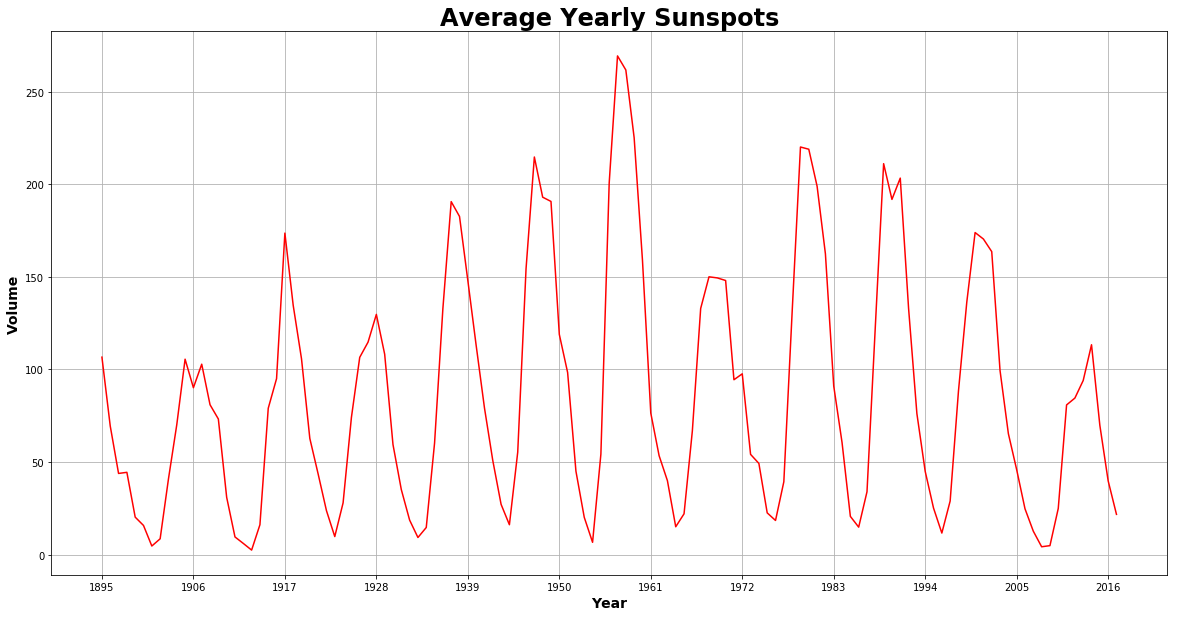

In [247]:
# Generate the Plot
plt.figure(figsize = (20,10))
plt.title("Average Yearly Sunspots",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Volume", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(np.arange(1895,2020,step=11))
plt.grid(True)

sunspot_yearly = sunspot_yearly.set_index("Year")
x_axis = sunspot_yearly.index
sunspot_yearly_mean_total = sunspot_yearly["Yearly Mean Total Sunspots"]

plt.plot(x_axis, sunspot_yearly_mean_total, color='red')
plt.savefig(plots_file_name+"Average.Yearly.Sunspots.png")
plt.show()

# Terra Firma Weather

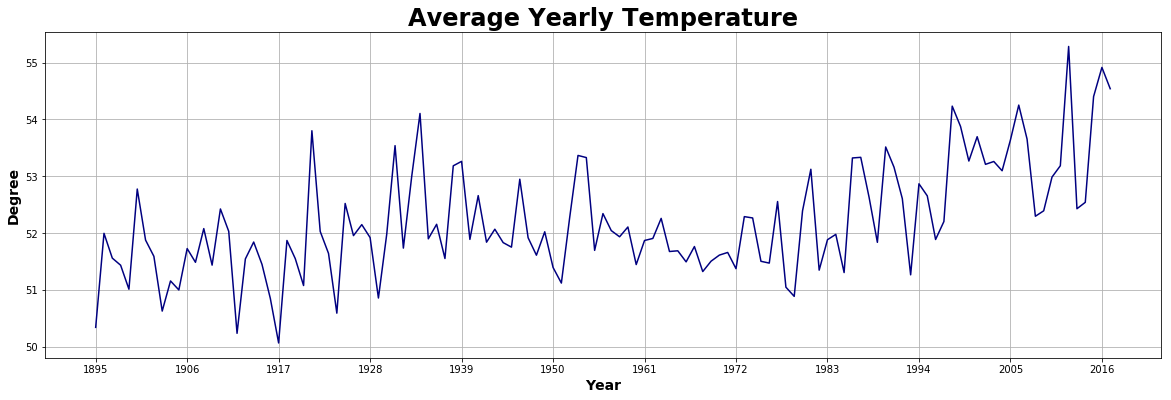

In [248]:
# Generate the Plot
plt.figure(figsize = (20,6))
plt.title("Average Yearly Temperature",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(np.arange(1895,2020,step=11))
plt.grid(True)

x_axis = temp_average.index

plt.plot(x_axis, temp_average.mean(axis=1), color='navy')
plt.savefig(plots_file_name+"Average.Yearly.Temperature.png")
plt.show()

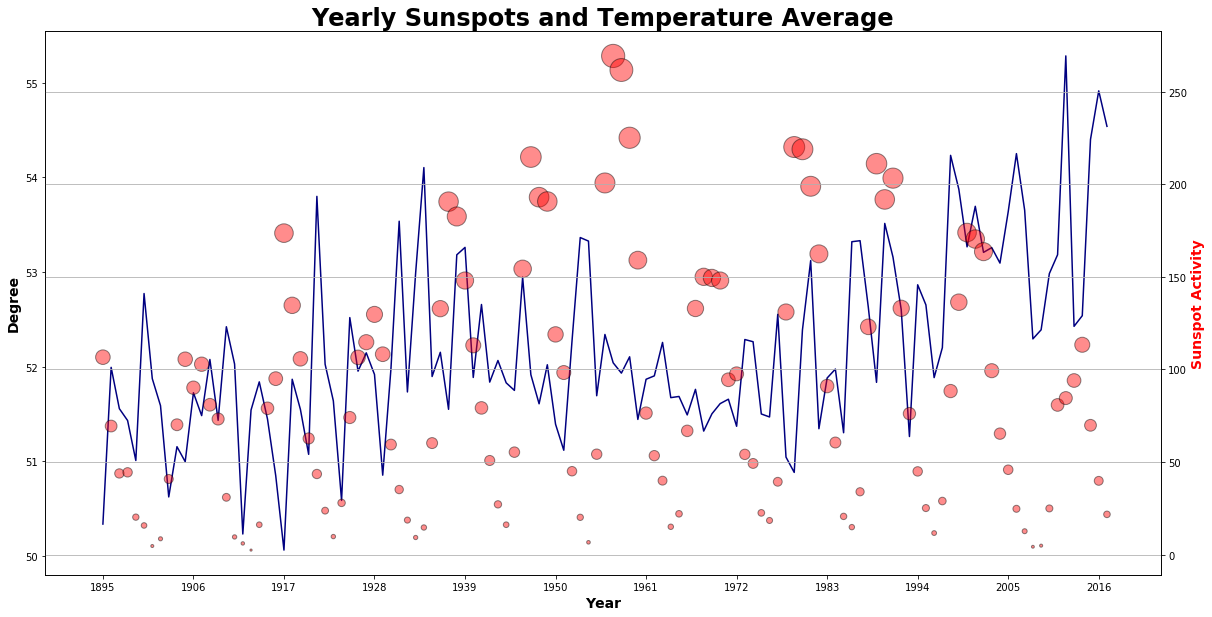

In [249]:
# Generate the Plot
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_title("Yearly Sunspots and Temperature Average",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax2.set_ylabel("Sunspot Activity", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")

x_axis = temp_average.index

ax1.set_xticks(np.arange(1895,2020,step=11))
ax1.plot(x_axis, temp_average.mean(axis=1), color='navy')
ax2.scatter(x_axis, sunspot_yearly_mean_total, color='red', edgecolors='black', s=(sunspot_yearly_mean_total*2), alpha=.45)

plt.grid(True)
plt.savefig(plots_file_name+"Yearly.Sunspots_Temperature.Average.png")
plt.show()

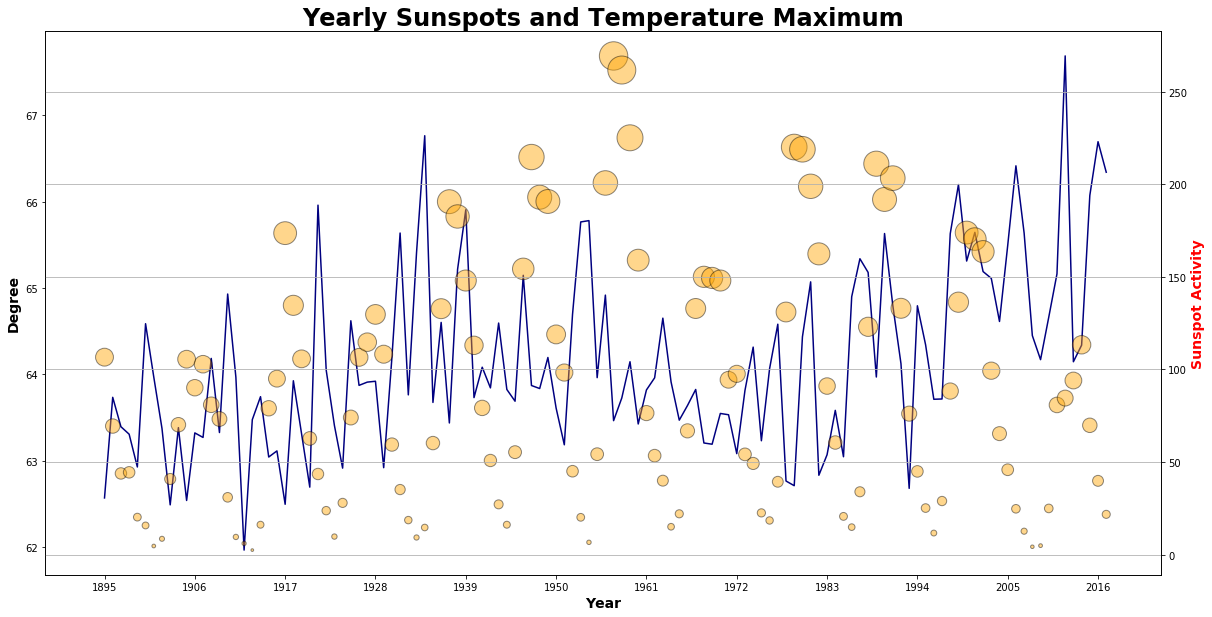

In [250]:
# Generate the Plot
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.set_title("Yearly Sunspots and Temperature Maximum",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax2.set_ylabel("Sunspot Activity", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")

x_axis = temp_maximum.index

ax1.set_xticks(np.arange(1895,2020,step=11))
ax1.plot(x_axis, temp_maximum.mean(axis=1), color='navy')
ax2.scatter(x_axis, sunspot_yearly_mean_total, color='orange', edgecolors='black', s=(sunspot_yearly_mean_total*3), alpha=.45)

plt.grid(True)
plt.savefig(plots_file_name+"Yearly.Sunspots_Temperature.Maximum.png")
plt.show()

### Summer and Winter

In [251]:
temp_maximum = temp_maximum.reset_index()
temp_maximum_summer = temp_maximum[["Year", "June", "July", "Aug"]]
temp_maximum_summer = temp_maximum_summer.set_index("Year")

In [252]:
temp_max_summer_mean = pd.DataFrame(temp_maximum_summer.mean(axis=1))
temp_max_summer_mean.rename(index=str, columns={0:'Temp'}, inplace=True)

In [253]:
temp_minimum = temp_maximum.reset_index()
temp_minimum_winter = temp_minimum[["Year", "Jan", "Feb", "Dec"]]
temp_minimum_winter = temp_minimum_winter.set_index("Year")

In [254]:
temp_min_winter = pd.DataFrame(temp_minimum_winter.stack(level=0))
temp_min_winter = temp_min_winter.reset_index()
temp_min_winter.rename(index=str, columns={'level_1': 'Month',0:'Temp'}, inplace=True)

In [255]:
# winter carries over into next calendar year; adjusted dataset for "Winter Year"
winter_year = []
for index, row in temp_min_winter.iterrows():
    if row["Month"] == "Dec":
        winter_year.append(row["Year"]+1)
    else:
        winter_year.append(row["Year"])

temp_min_winter["Winter Year"] = winter_year
temp_min_winter = temp_min_winter[temp_min_winter["Winter Year"] != 2018]

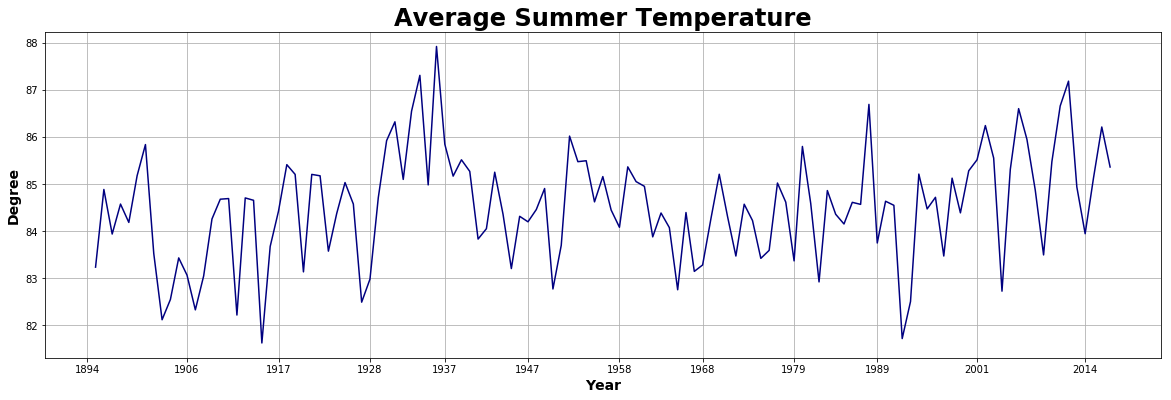

In [256]:
# Generate the Plot (summer)
plt.figure(figsize = (20,6))
plt.title("Average Summer Temperature",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(solar_maximum_years)
plt.grid(True)

x_axis = temp_maximum_summer.index
plt.plot(x_axis, temp_maximum_summer.mean(axis=1), color='navy')

plt.savefig(plots_file_name+"Average.Summer.Temperature.png")
plt.show()

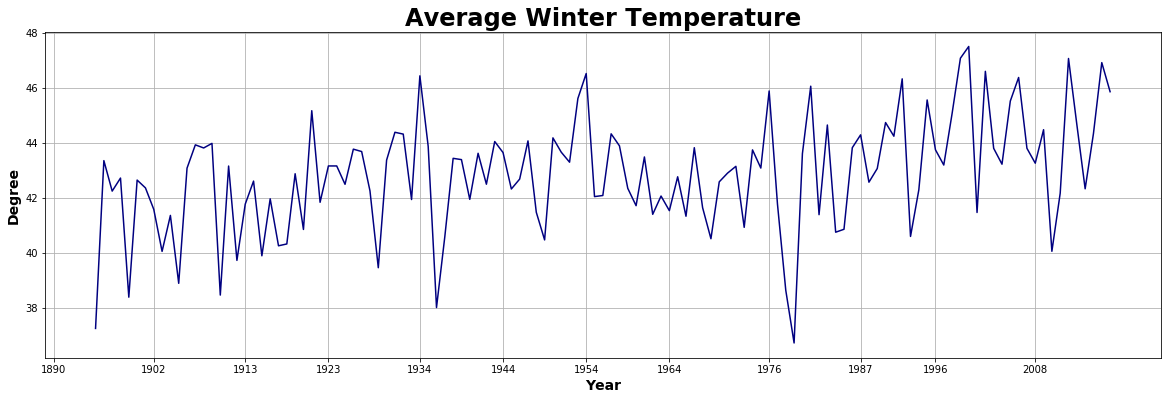

In [257]:
# Generate the Plot (winter)
plt.figure(figsize = (20,6))
plt.title("Average Winter Temperature",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel("Degree", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(solar_minimum_years)
plt.grid(True)

temp_min_winter_mean = pd.DataFrame(temp_min_winter.groupby(["Winter Year"]).mean()["Temp"])
x_axis = temp_min_winter_mean.index

plt.plot(x_axis, temp_min_winter_mean, color='navy')

plt.savefig(plots_file_name+"Average.Winter.Temperature.png")
plt.show()

### Summer and Winter Rolling

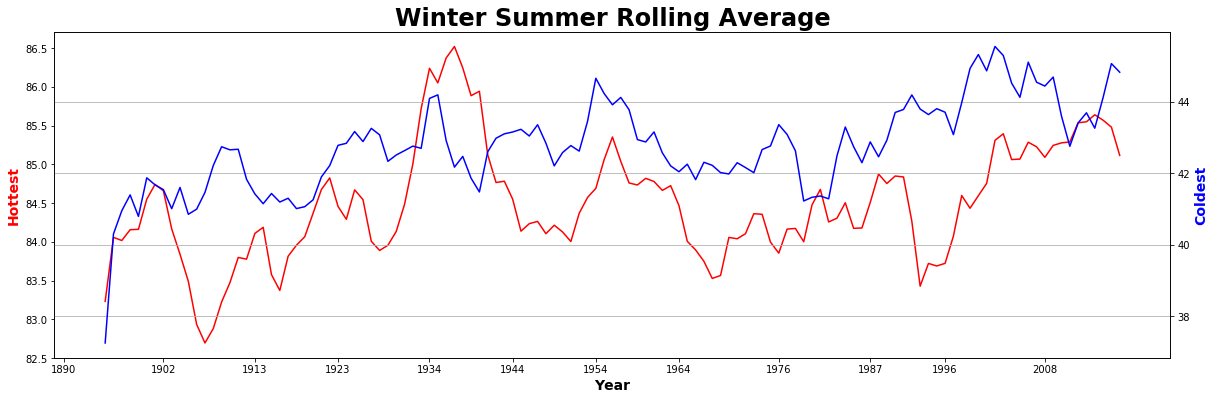

In [258]:
# Generate the Plot
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_title("Winter Summer Rolling Average",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Hottest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")
ax2.set_ylabel("Coldest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "blue")

x_axis = temp_min_winter_mean.index
temp_min_winter_rolling_mean = temp_min_winter_mean.rolling(window=5, min_periods=1).mean()
temp_max_summer_rolling_mean = temp_max_summer_mean.rolling(window=5, min_periods=1).mean()

ax1.set_xticks(solar_minimum_years)
ax1.plot(x_axis, temp_max_summer_rolling_mean, color='red')
ax2.plot(x_axis, temp_min_winter_rolling_mean, color='blue')

plt.grid(True)
plt.savefig(plots_file_name+"Winter.Summer_Rolling.Average.png")
plt.show()

### Summer/Winter Sunspots Rolling Average

In [259]:
sunspot_monthly["Month"] = sunspot_monthly["Month"].apply(solis.vert_month_num)
sunspot_monthly = sunspot_monthly[["Year", "Month", "Monthly Mean Total"]]

In [260]:
sunspot_monthly = sunspot_monthly.pivot(index='Year', columns='Month', values='Monthly Mean Total')
sunspot_monthly = sunspot_monthly.reset_index()

In [261]:
sunspot_summer = sunspot_monthly[["Year", "June", "July", "Aug"]]
sunspot_summer = sunspot_summer[sunspot_summer["Year"] != 2018]
sunspot_summer = sunspot_summer.set_index("Year")
sunspot_summer_mean = pd.DataFrame(sunspot_summer.mean(axis=1))
sunspot_summer_mean.rename(index=str, columns={0:'Temp'}, inplace=True)

In [262]:
sunspot_winter = sunspot_monthly[["Year", "Jan", "Feb", "Dec"]]
sunspot_winter = sunspot_winter[sunspot_winter["Year"] != 2018]
sunspot_winter = sunspot_winter.set_index("Year")
sunspot_winter_mean = pd.DataFrame(sunspot_winter.mean(axis=1))
sunspot_winter_mean.rename(index=str, columns={0:'Temp'}, inplace=True)

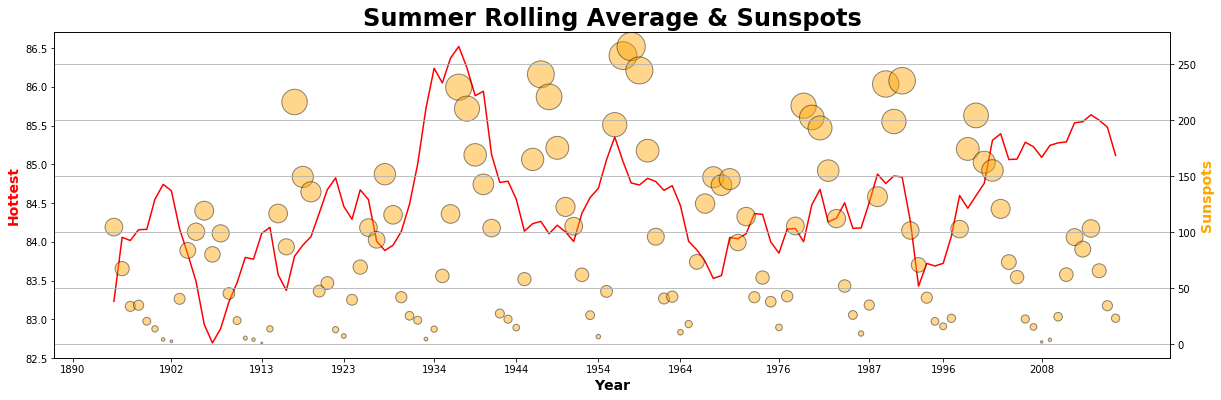

In [263]:
# Generate the Plot
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_title("Summer Rolling Average & Sunspots",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Hottest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")
ax2.set_ylabel("Sunspots", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "orange")

x_axis = dataset_year_range
ax1.set_xticks(solar_minimum_years)
ax1.plot(x_axis, temp_max_summer_rolling_mean, color='red')
ax2.scatter(x_axis, sunspot_summer_mean, color='orange', edgecolors='black', s=(sunspot_summer_mean*3), alpha=.45)

plt.savefig(plots_file_name+"Summer.Rolling.Average_Sunspots.png")
plt.grid(True)
plt.show()

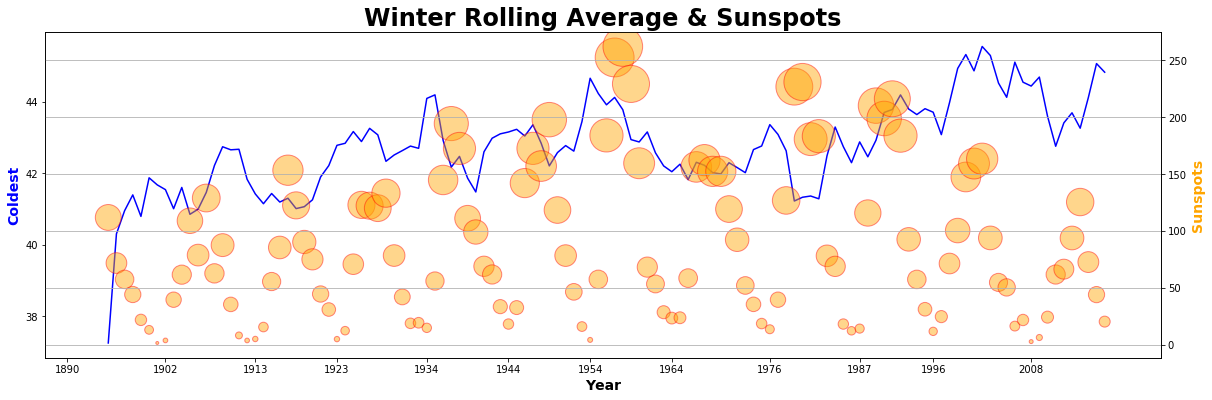

In [264]:
# Generate the Plot
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_title("Winter Rolling Average & Sunspots",fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax1.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Coldest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "blue")
ax2.set_ylabel("Sunspots", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "orange")

x_axis = dataset_year_range
ax1.set_xticks(solar_minimum_years)
ax1.plot(x_axis, temp_min_winter_rolling_mean, color='blue')
ax2.scatter(x_axis, sunspot_winter_mean, color='orange', edgecolors='red', s=(sunspot_winter_mean*6), alpha=.45)

plt.savefig(plots_file_name+"Winter.Rolling.Average_Sunspots.png")
plt.grid(True)
plt.show()

In [272]:
# sunspot_summer = sunspot_summer[sunspot_summer["Year"] != 2018]

year_start = 1929
year_end   = 1941

#x_axis = np.arange(year_range+1,2018,step=1)
x_axis = np.arange(year_start,year_end+1,step=1)

sunspot_winter_mean_df = sunspot_winter_mean.reset_index()
temp_min_winter_rolling_mean_df = temp_min_winter_rolling_mean.reset_index()

sunspot_summer_mean_df = sunspot_summer_mean.reset_index()
temp_max_summer_rolling_mean_df = temp_max_summer_rolling_mean.reset_index()

sunspot_winter_mean_year_range = \
    pd.DataFrame(sunspot_winter_mean_df[(pd.to_numeric(sunspot_winter_mean_df["Year"]) >= year_start) & \
                                        (pd.to_numeric(sunspot_winter_mean_df["Year"]) <= year_end)])

temp_min_winter_rolling_mean_year_range = \
    pd.DataFrame(temp_min_winter_rolling_mean_df[(pd.to_numeric(temp_min_winter_rolling_mean_df["Winter Year"]) >= year_start) & \
                                                 (pd.to_numeric(temp_min_winter_rolling_mean_df["Winter Year"]) <= year_end)])

In [273]:
sunspot_winter_mean_year_range = sunspot_winter_mean_year_range.set_index("Year")
temp_min_winter_rolling_mean_year_range = temp_min_winter_rolling_mean_year_range.set_index("Winter Year")

sunspot_summer_mean_year_range = \
    pd.DataFrame(sunspot_summer_mean_df[(pd.to_numeric(sunspot_summer_mean_df["Year"]) >= year_start) & \
                                        (pd.to_numeric(sunspot_summer_mean_df["Year"]) <= year_end)])

temp_max_summer_rolling_mean_year_range = \
    pd.DataFrame(temp_max_summer_rolling_mean_df[(pd.to_numeric(temp_max_summer_rolling_mean_df["Year"]) >= year_start) & \
                                                 (pd.to_numeric(temp_max_summer_rolling_mean_df["Year"]) <= year_end)])

sunspot_summer_mean_year_range = sunspot_summer_mean_year_range.set_index("Year")
temp_max_summer_rolling_mean_year_range = temp_max_summer_rolling_mean_year_range.set_index("Year")

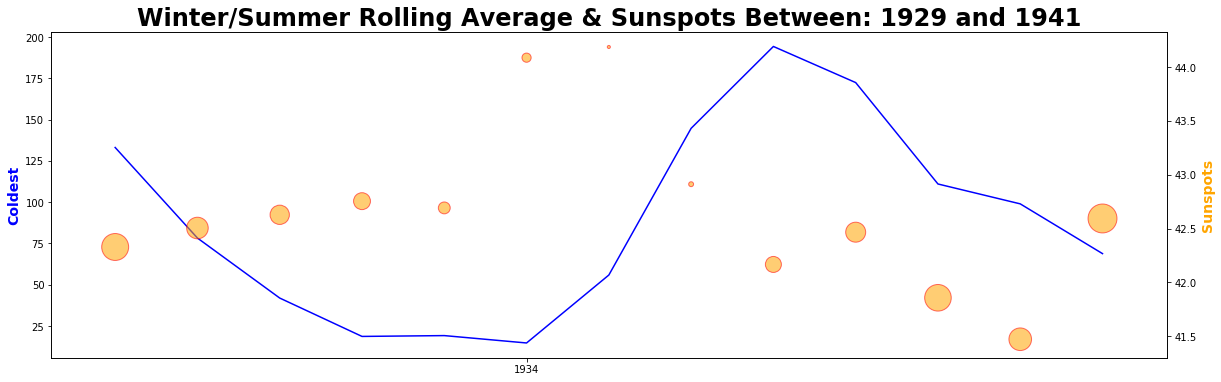

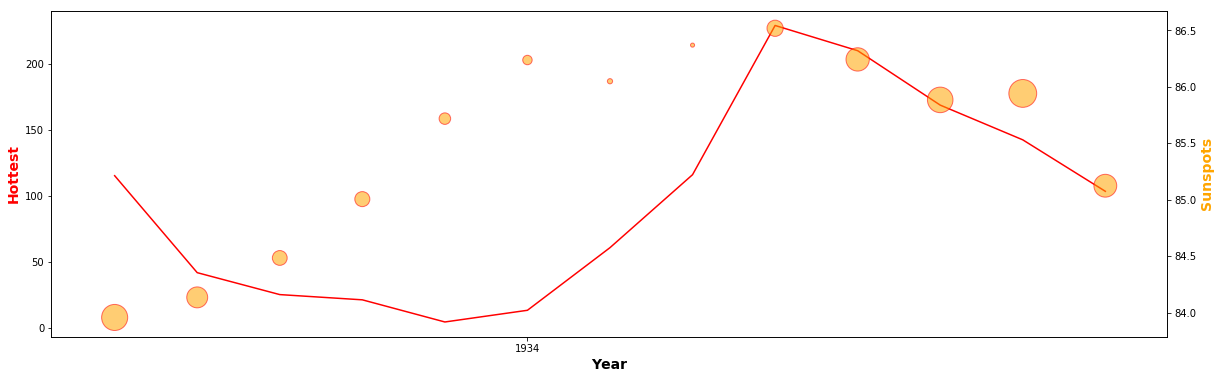

In [274]:
# Generate the Plot
fig1 = plt.figure(figsize = (20,6))
fig2 = plt.figure(figsize = (20,6))
ax1 = fig1.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax11 = fig2.add_subplot(1, 1, 1)
ax22 = ax11.twinx()

ax1.set_title("Winter/Summer Rolling Average & Sunspots Between: "+str(year_start)+" and "+str(year_end),fontdict = {'fontsize': 24, 'fontweight': 'bold'})
ax11.set_xlabel("Year", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_ylabel("Coldest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "blue")
ax11.set_ylabel("Hottest", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "red")
ax2.set_ylabel("Sunspots", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "orange")
ax22.set_ylabel("Sunspots", fontdict = {'fontsize': 14, 'fontweight': 'bold'}, color = "orange")

ax1.set_xticks(solar_minimum_years)
ax22.set_xticks(solar_minimum_years)
ax1.plot(x_axis, sunspot_winter_mean_year_range, color='blue')
ax11.plot(x_axis, sunspot_summer_mean_year_range, color='red')

ax2.scatter(x_axis, temp_min_winter_rolling_mean_year_range, color='orange', edgecolors='red', s=(sunspot_winter_mean*6.5), alpha=.55)
ax22.scatter(x_axis, temp_max_summer_rolling_mean_year_range, color='orange', edgecolors='red', s=(sunspot_summer_mean*6.5), alpha=.55)

plt.savefig(plots_file_name+"Winter.Summer.Average_Sunspots_"+str(year_start)+"."+str(year_end)+".png")
plt.grid(False)
plt.show()